In [1]:
import itertools
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
import re
import scipy.stats as st 

from pe_parser import parse_pe # parses a run-time log to a JSON.

In [6]:
dataset_sizes = {
     # 'bishops_cleeve_uk_truncated10': 10,
     # 'bishops_cleeve_uk_truncated20': 20,
     # 'bishops_cleeve_uk_truncated30': 30,
     # 'bishops_cleeve_uk_truncated40': 40,
     # 'bishops_cleeve': 51,
     # 'stroud_uk_truncated60': 60,
     # 'stroud_uk_truncated70': 70,
     # 'stroud_uk_truncated80': 80,
     # 'stroud_uk_truncated90': 90,
     # 'stroud_uk_truncated100': 111,
     # 'stroud': 111,
     # 'cheltenham_uk_truncated125': 125,
     # 'cheltenham_uk_truncated150': 150,
     # 'cheltenham_uk_truncated175': 175,
     # 'cheltenham_uk_truncated200': 200,
     # 'cheltenham_uk_truncated225': 225,
     # 'cheltenham': 267,
     # 'southampton_uk_truncated300': 300,
     # 'southampton_uk_truncated350': 350,
     # 'southampton_uk_truncated400': 400,
     # 'southampton': 455,
     # 'bristol_uk_truncated500': 500,
     'cheltenham20': 20,
     'cheltenham30': 30,
     'cheltenham40': 40,
     'cheltenham50': 50,
     'cheltenham80': 80,
     'cheltenham100': 100,
     'cheltenham150': 150,
     'southampton200': 200,
     'southampton250': 250,
     # 'bristol300': 300,
     'gloucestershire350': 350,
     'gloucestershire400': 400,
     # 'bristol': 767,
     # 'gloucestershire': 996,
     # 'southern_england': 1356,
}

seq_translations = {
    "bellman_ford_adj_matrix": "bellman_ford_seq", # bellman-ford
    "distance_vector": "bellman_ford_seq", # distance vector
    "foxotto": "matmult_seq", # fox-otto
    "cannons": "matmult_seq", # pipelined cannon's
    "unpipelined_cannons": "matmult_seq", # regular cannon's
    "floyd_warshall": "floyd_warshall_seq"  # floyd-warshall
}

inv_seq_translations = {
    v: k for (k, v) in seq_translations.items()
}

data_dir = "data"
seq_data_dir = "seq_data"

no_confidence_above = 500


In [23]:
runs = {
    "bellman_ford_adj_matrix": [], # bellman-ford
    "distance_vector": [], # distance vector
    "foxotto": [], # fox-otto
    "cannons": [], # pipelined cannon's
    "unpipelined_cannons": [],
    "floyd_warshall": []  # floyd-warshall
}

for d in os.listdir(data_dir):
    if d.startswith(".ipynb_checkpoints"):
        continue
    elif d in runs:
        print("[WARNING] Unlabeled algorithmic data:", d)
        continue
    elif d not in dataset_sizes:
        print("[WARNING] Unrecognized dataset:", d)
        continue
    print("[INFO] Processing dataset:", d)
    for r in runs:
        current_algo = os.path.join(data_dir, d, r)
        if not os.path.exists(current_algo):
            print("[WARNING] Missing data:", current_algo)
            continue
        for f in os.listdir(current_algo):
            if f.startswith(".ipynb_checkpoints"): 
                continue
            elif f.startswith("distances") or f.startswith("predecessor") or f.startswith("successor"):
                continue
            str_data = ""
            with open(os.path.join(current_algo, f), "r") as F:
                str_data = F.read()

            
            try:
                dict_data = parse_pe(str_data)
            except Exception as e:
                print(e)
                print(f)
                print(r)
                raise e
                continue
            m = re.search(r"(\d+)x\d+_([A-Za-z]+)\$_(\d+)\.txt", f)
            q = int(m[1])
            parameter_set = m[2]
            ts = int(m[3])
            size = dataset_sizes[d]
            runs[r].append({
                "q": q,
                "graph_nodes": size,
                "size": size,
                "ts": ts,
                "parameters": parameter_set,
                "data": dict_data
            })
for r in runs:
    runs[r].sort(key=lambda t: (t["graph_nodes"], t["parameters"], t["q"]))


seq_runs = {
    "bellman_ford_seq": [], # bellman-ford, distance vector
    "floyd_warshall_seq": [], # floyd warshall
    "matmult_seq": [], # fox-otto, cannons
}

print("[INFO] starting seq data")
for d in os.listdir(seq_data_dir):
    if d.startswith(".ipynb_checkpoints"):
        continue
    elif d not in dataset_sizes:
        print("[WARNING] Unrecognized dataset:", d)
        continue
    for r in seq_runs:
        current_algo = os.path.join(seq_data_dir, d, r)
        if not os.path.exists(current_algo):
            print("[WARNING] Missing data:", current_algo)
            continue
        for f in os.listdir(current_algo):
            if f.startswith(".ipynb_checkpoints"): 
                continue
            elif not os.path.exists(current_algo):
                print("[WARNING] Data for some but not all algorithms:", current_algo)
                continue
            elif f.startswith("distances") or f.startswith("predecessor") or f.startswith("successor"):
                continue
            str_data = ""
            with open(os.path.join(current_algo, f), "r") as F:
                str_data = F.read()
            dict_data = parse_pe(str_data)
            m = re.search(r"(\d+)x\d+_([A-Za-z]+)\$_(\d+)\.txt", f)
            q = int(m[1])
            parameter_set = m[2]
            ts = int(m[3])
            size = dataset_sizes[d]
            seq_runs[r].append({
                "q": q,
                "graph_nodes": size,
                "size": size,
                "ts": ts,
                "parameters": parameter_set,
                "data": dict_data
            })
            runs[inv_seq_translations[r]].append({
                "q": q,
                "graph_nodes": size,
                "size": size,
                "ts": ts,
                "parameters": parameter_set,
                "data": dict_data
            })
for r in seq_runs:
    seq_runs[r].sort(key=lambda t: (t["graph_nodes"], t["parameters"], t["q"]))

print("[INFO] Finished.")

[WARNING] Unlabeled algorithmic data: bellman_ford_adj_matrix
[WARNING] Unrecognized dataset: bristol
[WARNING] Unrecognized dataset: bristol300
[WARNING] Unrecognized dataset: bristol_uk_truncated500
[INFO] Processing dataset: cheltenham100
[INFO] Processing dataset: cheltenham150
[INFO] Processing dataset: cheltenham20
[INFO] Processing dataset: cheltenham30
[INFO] Processing dataset: cheltenham40
[INFO] Processing dataset: cheltenham50
[INFO] Processing dataset: cheltenham80
[INFO] Processing dataset: gloucestershire
[INFO] Processing dataset: gloucestershire350
[INFO] Processing dataset: gloucestershire400
[WARNING] Unrecognized dataset: idk
[INFO] Processing dataset: southampton200
[INFO] Processing dataset: southampton250
[INFO] Processing dataset: southern_england
[INFO] starting seq data
[WARNING] Unrecognized dataset: bristol
[WARNING] Unrecognized dataset: bristol300
[WARNING] Unrecognized dataset: bristol_uk_truncated500
[INFO] Finished.


In [24]:
def matches(d1, d2):
    mandatory_same_attr = ["q", "graph_nodes", "parameters"]
    return all(d1[attr] == d2[attr] for attr in mandatory_same_attr)


def mergeInto(d1, d2):
    """
    Merges d2 into d1, modify d1 in place!
    """
    assert(matches(d1, d2))
    for core in d1["data"]:
        d1["data"][core]["ExecutionContext"]["PeakMemoryListener"].setdefault("samples", [d1["data"][core]["ExecutionContext"]["PeakMemoryListener"]["peak_memory"]])
        d2["data"][core]["ExecutionContext"]["PeakMemoryListener"].setdefault("samples", [d2["data"][core]["ExecutionContext"]["PeakMemoryListener"]["peak_memory"]])
        d1["data"][core]["ExecutionContext"]["PeakMemoryListener"]["samples"] += d2["data"][core]["ExecutionContext"]["PeakMemoryListener"]["samples"]
        d1["data"][core]["Latency"]["samples"] += d2["data"][core]["Latency"]["samples"]
        for e in d1["data"][core]["Latency"]["TimeTallyListener"]:
            if e == "avg":
                continue
            d1["data"][core]["Latency"]["TimeTallyListener"][e]["samples"] += d2["data"][core]["Latency"]["TimeTallyListener"][e]["samples"]


for alg in runs:
    print(f"[INFO] Shortening data for {alg}")
    initial_length = len(runs[alg])
    new_d = [runs[alg][0]]
    for r in runs[alg][1:]:
        if matches(r, new_d[-1]):
            mergeInto(new_d[-1], r)
        else:
            if (0, 0) in r["data"]:
                new_d.append(r)
    runs[alg] = new_d
    final_length = len(runs[alg])
    print(f"[INFO] ({alg}) Removed", initial_length - final_length, "entries")

for alg in seq_runs:
    print(f"[INFO] Shortening data for {alg}")
    initial_length = len(seq_runs[alg])
    new_d = [seq_runs[alg][0]]
    for r in seq_runs[alg][1:]:
        if matches(r, new_d[-1]):
            mergeInto(new_d[-1], r)
        else:
            if (0, 0) in r["data"]:
                new_d.append(r)
    seq_runs[alg] = new_d
    final_length = len(seq_runs[alg])
    print(f"[INFO] ({alg}) Removed", initial_length - final_length, "entries")

[INFO] Shortening data for bellman_ford_adj_matrix
[INFO] (bellman_ford_adj_matrix) Removed 2090 entries
[INFO] Shortening data for distance_vector
[INFO] (distance_vector) Removed 2299 entries
[INFO] Shortening data for foxotto
[INFO] (foxotto) Removed 2082 entries
[INFO] Shortening data for cannons
[INFO] (cannons) Removed 2087 entries
[INFO] Shortening data for unpipelined_cannons
[INFO] (unpipelined_cannons) Removed 2300 entries
[INFO] Shortening data for floyd_warshall
[INFO] (floyd_warshall) Removed 2299 entries
[INFO] Shortening data for bellman_ford_seq
[INFO] (bellman_ford_seq) Removed 209 entries
[INFO] Shortening data for floyd_warshall_seq
[INFO] (floyd_warshall_seq) Removed 209 entries
[INFO] Shortening data for matmult_seq
[INFO] (matmult_seq) Removed 210 entries


In [27]:
runs["floyd_warshall"] = [r for r in runs["floyd_warshall"] if r["graph_nodes"] <= 400]

In [25]:
DESIGNATED_PARA_CORE = (0, 0)
MARKER_SIZE = 2

def confidence_interval(interval: float, data: np.array) -> (float, float):
    return st.t.interval(confidence=interval, 
                         df=len(data)-1, 
                         loc=np.mean(data), 
                         scale=st.sem(data)) 

def compare_memory_on(ax, seq_runs, seq_algorithm, runs, algorithm, graph_size, color, label="", skip_edge=True, **font):
    data = []
    for r in seq_runs[seq_algorithm]:
        if r["graph_nodes"] == graph_size and r["parameters"] == "MulticoreComputer":
            data.append(r)
            break
    for r in runs[algorithm]:
        if r["graph_nodes"] == graph_size and r["parameters"] == "MulticoreComputer":
            data.append(r)
    data.sort(key=lambda t: t["q"])
    print([d["q"] for d in data])
    xs = []
    ys = []
    conf_highs = []
    conf_lows = []
    for r in data:
        y_samples = []
        para_cores = [p for p in r["data"] if p != (0, 0) or skip_edge or len(r["data"]) == 1]
        for p in para_cores:
            r["data"][p]["ExecutionContext"]["PeakMemoryListener"].setdefault("samples", [r["data"][p]["ExecutionContext"]["PeakMemoryListener"]["peak_memory"]])
        y_samples = np.sum([np.array(r["data"][p]["ExecutionContext"]["PeakMemoryListener"]["samples"]) for p in para_cores], axis=0)/len(para_cores)
        y_samples = np.array(y_samples)
        y_mean = np.mean(y_samples)
        if len(y_samples) > 1:
            conf_low, conf_high = confidence_interval(0.95, y_samples)
            conf_lows.append(conf_low)
            conf_highs.append(conf_high)
        else:
            conf_lows.append(y_mean)
            conf_highs.append(y_mean)
        xs.append(r["q"])
        ys.append(y_mean)
    xs = np.array(xs)#**2
    ys = np.array(ys)
    print(ys)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.plot(xs,ys, color=color, marker="o", markersize=MARKER_SIZE, label=label)
    ax.fill_between(xs, (conf_highs), (conf_lows), color=color, alpha=.235)
    # ax.errorbar(xs, ys, yerr=(ys - conf_lows, conf_highs - ys), capsize=3, ecolor = color, color=color, label=label)
    ax.set_ylabel("Avg. peak memory (B)", **font)
    ax.set_xlabel("$\\sqrt{p}$", **font)
    # ax.errorbar(xs, ys, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")


def compare_algorithm_on(ax, seq_runs, seq_algorithm, runs, algorithm, size, parameter, color, label="", core=DESIGNATED_PARA_CORE, **font):
    data = []
    for r in seq_runs[seq_algorithm]:
        if r["graph_nodes"] == size and r["parameters"] == "MulticoreComputer":
            data.append(r)
            break
    for r in runs[algorithm]:
        if r["graph_nodes"] == size and r["parameters"] == parameter:
            data.append(r)
    data.sort(key=lambda t: t["q"])
    xs = []
    ys = []
    conf_highs = []
    conf_lows = []
    for r in data:
        y_samples = np.array(r["data"][core]["Latency"]["samples"])
        (conf_low, conf_high) = confidence_interval(0.95, y_samples)
        y_mean = np.mean(y_samples)
        xs.append(r["q"])
        ys.append(y_mean)
        conf_highs.append(conf_high)
        conf_lows.append(conf_low)
    xs = np.array(xs)
    ys = np.array(ys)/1e12
    ax.set_yscale('log')
    conf_highs = np.array(conf_highs)/1e12
    conf_lows = np.array(conf_lows)/1e12
    # ax.plot(xs,ys, color=color, label=label)
    # ax.fill_between(xs, (conf_highs), (conf_lows), color=color, alpha=.1)
    ax.plot(xs, ys, color=color, label=label, marker="o", markersize=MARKER_SIZE)
    ax.fill_between(xs, (conf_highs), (conf_lows), color=color, alpha=.235)
    # ax.errorbar(xs, ys, yerr=(ys - conf_lows, conf_highs - ys), capsize=3, ecolor = color, color=color, label=label)
    ax.set_ylabel("Time (s)", **font)
    # ax.errorbar(xs, ys, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")


def plot_memory_on(ax, runs, algorithm, q, parameter, color, label="", mode="time", sizes_geq=0, skip_edge=True, **font):
    data = []
    for r in runs[algorithm]:
        if r["q"] == q and r["parameters"] == parameter and r["graph_nodes"] >= sizes_geq:
            data.append(r)
    data.sort(key=lambda t: t["graph_nodes"])
    xs = []
    ys = []
    conf_highs = []
    conf_lows = []
    for r in data:
        y_samples = []
        para_cores = [p for p in r["data"] if p != (0, 0) or skip_edge or len(r["data"]) == 1]
        for p in para_cores:
            r["data"][p]["ExecutionContext"]["PeakMemoryListener"].setdefault("samples", [r["data"][p]["ExecutionContext"]["PeakMemoryListener"]["peak_memory"]])
        y_samples = np.sum([np.array(r["data"][p]["ExecutionContext"]["PeakMemoryListener"]["samples"]) for p in para_cores], axis=0)/len(para_cores)
        # for para_core in r["data"]:
        #     if para_core == (0, 0) and skip_edge: continue
        #     y_samples.append(r["data"][para_core]["ExecutionContext"]["PeakMemoryListener"]["peak_memory"])
        y_samples = np.array(y_samples)
        y_mean = np.mean(y_samples)
        if len(y_samples) > 1:
            conf_low, conf_high = confidence_interval(0.95, y_samples)
            conf_lows.append(conf_low)
            conf_highs.append(conf_high)
        else:
            conf_lows.append(y_mean)
            conf_highs.append(y_mean)
        xs.append(r["graph_nodes"])
        ys.append(y_mean)
    xs = np.array(xs)
    ys = np.array(ys)
    ax.set_yscale("log")
    ax.plot(xs,ys, color=color, marker="o", markersize=MARKER_SIZE)
    ax.fill_between(xs, (conf_highs), (conf_lows), color=color, alpha=.235)
    # ax.errorbar(xs, ys, yerr=(ys - conf_lows, conf_highs - ys), capsize=3, ecolor = color, color=color, label=label)
    ax.set_ylabel("Avg. PE peak memory (B)", **font)
    # ax.errorbar(xs, ys, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")

def plot_algorithm_on(ax, runs, algorithm, q, parameter, color, label="", mode="time", sizes_geq=0, core=DESIGNATED_PARA_CORE, **font):
    data = []
    for r in runs[algorithm]:
        if r["q"] == q and r["parameters"] == parameter and r["graph_nodes"] >= sizes_geq:
            data.append(r)
    data.sort(key=lambda t: t["graph_nodes"])
    xs = []
    ys = []
    conf_highs = []
    conf_lows = []
    for r in data:
        y_samples = np.array(r["data"][core]["Latency"]["samples"])
        (conf_low, conf_high) = confidence_interval(0.95, y_samples)
        y_mean = np.mean(y_samples)
        xs.append(r["graph_nodes"])
        ys.append(y_mean)
        conf_highs.append(conf_high)
        conf_lows.append(conf_low)
    xs = np.array(xs)
    ys = np.array(ys)/1e12
    ax.set_yscale('log')
    conf_highs = np.array(conf_highs)/1e12
    conf_lows = np.array(conf_lows)/1e12
    # ax.plot(xs,ys, color=color, label=label)
    # ax.fill_between(xs, (conf_highs), (conf_lows), color=color, alpha=.1)
    ax.plot(xs, ys, color=color, label=label, marker="o", markersize=MARKER_SIZE)
    ax.fill_between(xs, (conf_highs), (conf_lows), color=color, alpha=.235)
    # ax.errorbar(xs, ys, yerr=(ys - conf_lows, conf_highs - ys), capsize=3, ecolor = color, color=color, label=label)
    ax.set_ylabel("Time (s)", **font)
    # ax.errorbar(xs, ys, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")


def plot_utilization_on(ax, runs, algorithm, q, parameter, color, label="", sizes_geq=20, core=DESIGNATED_PARA_CORE, **font):
    data = []
    for r in runs[algorithm]:
        if r["q"] == q and r["parameters"] == parameter and r["graph_nodes"] >=sizes_geq:
            data.append(r)
    data.sort(key=lambda t: t["graph_nodes"])
    xs = []
    efficiency = []
    conf_highs = []
    conf_lows  = []

    on_cpu_events    = ["ALUEvent", "BranchEvent", "AllocationEvent", "DeallocationEvent"]
    msg_times_events = ["MessageSendEvent", "MessageReadEvent", "CachedMemoryLookupEvent"]
    for r in data:
        on_cpu_samples = np.zeros(20)
        for e in on_cpu_events:
            on_cpu_samples += np.array(r["data"][core]["Latency"]["TimeTallyListener"][e]["samples"])

        on_cpu_mean = np.mean(on_cpu_samples)
        (cpu_conf_low, cpu_conf_high) = confidence_interval(0.95, on_cpu_samples)
            
        msg_times_samples = np.zeros(20)
        for e in msg_times_events:
            msg_times_samples += np.array(r["data"][core]["Latency"]["TimeTallyListener"][e]["samples"])

        msg_mean = np.mean(msg_times_samples)   
        (msg_conf_low, msg_conf_high) = confidence_interval(0.95, msg_times_samples)

        efficiency.append(on_cpu_mean/(on_cpu_mean+msg_mean))
        conf_highs.append(cpu_conf_high/(cpu_conf_high+msg_conf_low))
        conf_lows.append(cpu_conf_low/(cpu_conf_low+msg_conf_high))
        
        xs.append(r["graph_nodes"])
        
    efficiency = np.array(efficiency)
    conf_highs = np.array(conf_highs)
    conf_lows  = np.array(conf_lows)
    xs = np.array(xs)
    
    # ax.plot(xs, efficiency, color=color, label=label)
    ax.errorbar(xs, efficiency, yerr=(efficiency - conf_lows, conf_highs - efficiency), capsize=3, ecolor = color, color=color)
    ax.set_ylabel("Utilization", **font)
    # ax.fill_between(xs, (conf_highs), (conf_lows), color=color, alpha=.235)
    # ax.errorbar(xs, ys, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")


def plot_speedup_on(ax, runs, seq_runs, par_algorithm, q, parameter, color, label="", plot_efficiency=False, sizes_geq=0, seq_translations=seq_translations, **font):
    seq_algorithm = seq_translations[par_algorithm]

    seq_sizes, speedup, conf_high, conf_low = get_speedup(ax, runs, seq_runs, par_algorithm, seq_algorithm, q, 1, parameter, sizes_geq)

    if plot_efficiency:
        speedup /= q * q
        conf_low /= q * q
        conf_high /= q * q
        
    # ax.plot(seq_sizes, speedup, color=color, label=label)
    # ax.fill_between(seq_sizes, (conf_high), (conf_low), color=color, alpha=.235)
    ax.plot(seq_sizes, speedup, color=color, label=label, marker="o", markersize=MARKER_SIZE)
    ax.fill_between(seq_sizes, (conf_high), (conf_low), color=color, alpha=.235)
    # ax.errorbar(seq_sizes, speedup, yerr=(speedup - conf_low, conf_high - speedup), capsize=3, ecolor = color, color=color)

    if plot_efficiency:
        ax.set_ylabel("Efficiency", **font)
        ax.set_ylim(0)
    else:
        ax.set_ylabel("Speedup", **font)
    # ax.errorbar(xs, ys, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")

def get_speedup(ax, runs, seq_runs, par_algorithm, seq_algorithm, q, q_seq, parameter, sizes_geq=0, parameter_first="MulticoreComputer"):

    seq_times     = []
    seq_conf_high = []
    seq_conf_low  =  []
    seq_sizes     = []

    seq_data = []
    for sr in seq_runs[seq_algorithm]:
        if sr["graph_nodes"] >= sizes_geq and sr["q"] == q_seq and sr["parameters"] == parameter_first:
            seq_data.append(sr)
            seq_sizes.append(sr["graph_nodes"])
    data = []
    par_sizes = []
    for r in runs[par_algorithm]:
        if r["q"] == q and r["parameters"] == parameter and r["graph_nodes"] in seq_sizes:
            data.append(r)
            par_sizes.append(r["graph_nodes"])

    seq_data.sort(key=lambda t: t["graph_nodes"])
    data.sort(key=lambda t: t["graph_nodes"])

    seq_data = [s for s in seq_data if s["graph_nodes"] in par_sizes]

    if (len(seq_data) != len(data)):
        print("HELP!")
        print([s["graph_nodes"] for s in seq_data])
        print([s["graph_nodes"] for s in data])
        return
    
    seq_sizes = [s["graph_nodes"] for s in seq_data]
    for sr in seq_data:
        y_samples = np.array(sr["data"][(0, 0)]["Latency"]["samples"])
        (conf_low, conf_high) = confidence_interval(0.95, y_samples)
        y_mean = np.mean(y_samples)
        seq_times.append(y_samples)
        seq_conf_high.append(conf_high)
        seq_conf_low.append(conf_low)
    # seq_times     = np.array(seq_times)
    # seq_conf_high = np.array(seq_conf_high)
    # seq_conf_low  = np.array(seq_conf_low)
            
    par_times     = []
    par_conf_high = []
    par_conf_low  = []
    par_q = []
    for r in data:
        y_samples = np.array(r["data"][DESIGNATED_PARA_CORE]["Latency"]["samples"])
        (conf_low, conf_high) = confidence_interval(0.95, y_samples)
        y_mean = np.mean(y_samples)
        par_times.append(y_samples)
        par_conf_high.append(conf_high)
        par_conf_low.append(conf_low)
        par_q.append(r["q"])
        
    # par_times     = np.array(par_times)
    # par_conf_high = np.array(par_conf_high)
    # par_conf_low  = np.array(par_conf_low)

    speedups = []
    conf_lows = []
    conf_highs = []
    for seq, par in zip(seq_times, par_times):
        samples = []
        for (s, p) in zip(seq, par):
            samples.append(s/p)
        samples = np.array(samples)
        speedups.append(np.mean(samples))
        conf_low, conf_high = confidence_interval(0.95, samples)
        conf_highs.append(conf_high)
        conf_lows.append(conf_low)

    seq_sizes = np.array(seq_sizes)
    speedups = np.array(speedups)
    conf_highs = np.array(conf_highs)
    conf_lows = np.array(conf_lows)
    
    ind = seq_sizes >= no_confidence_above
    conf_highs[ind] = speedups[ind]
    conf_lows[ind] = speedups[ind]

    return seq_sizes, speedups, conf_highs, conf_lows

def plot_relative_speedup_on(ax, runs, seq_runs, par_alg1, par_alg2, seq_alg, q, parameter, color, label="", sizes_geq=0):
    # seq_sizes, speedup1 = get_speedup(ax, runs, seq_runs, par_alg1, seq_alg, q, parameter, sizes_geq)
    seq_sizes, rel_speedup, conf_highs, conf_lows = get_speedup(ax, runs, runs, par_alg1, par_alg2, q, q, parameter, sizes_geq, parameter_first=parameter)
    
    # ax.errorbar(seq_sizes, rel_speedup, yerr=(rel_speedup - conf_lows, conf_highs - rel_speedup), capsize=3, ecolor=color, color=color, label=label)
    ax.plot(seq_sizes, rel_speedup, color=color, label=label, marker="o", markersize=MARKER_SIZE, zorder=1)
    ax.fill_between(seq_sizes, (conf_highs), (conf_lows), color=color, alpha=.235, zorder=1)

def plot_breakdown(ax, runs, par_algorithm, q, size, parameter, color, label="", sizes_geq=0, core=(0, 0), norm=False):

    data = []
    par_sizes = []
    for r in runs[par_algorithm]:
        if r["q"] == q and r["parameters"] == parameter and r["graph_nodes"] == size:
            data.append(r)
            par_sizes.append(r["graph_nodes"])

    events = {
        "ALUEvent": 0,
        "BranchEvent": 0,
        "AllocationEvent": 0,
        "DeallocationEvent": 0,
        "MessageSendEvent": 0,
        "MessageReadEvent": 0,
        "CachedMemoryLookupEvent": 0
    }

    total = 0
    for r in data:
        for k in events:
            events[k] += np.mean(r["data"][core]["Latency"]["TimeTallyListener"][k]["samples"])
            total += np.mean(r["data"][core]["Latency"]["TimeTallyListener"][k]["samples"])

    if norm:
        for k in events:
            events[k] /= total

    ax.bar(list(a.replace("Event", "").replace("Message", "").replace("Cached", "") for a in events.keys()), list(events.values()))

def plot_event_percent(ax, runs, par_algorithm, q, event, parameter, color, label="", sizes_geq=0, core=(0, 0), norm=False, exclude=["MessageReadEvent", "MessageSendEvent"]):

    data = []
    for r in runs[par_algorithm]:
        if r["q"] == q and r["parameters"] == parameter and r["graph_nodes"] >= sizes_geq:
            data.append(r)



    par_sizes = []
    percents = []
    totals = []
    conf_highs = []
    conf_lows = []

    for r in data:
        events = {
            "ALUEvent": [],
            "BranchEvent": [],
            "AllocationEvent": [],
            "DeallocationEvent": [],
            "MessageSendEvent": [],
            "MessageReadEvent": [],
            "CachedMemoryLookupEvent": [],
        }

        samples = []
        for s in range(len(r["data"][(0, 0)]["Latency"]["TimeTallyListener"]["ALUEvent"]["samples"])):
            ps = []
            for core in r["data"]:
                total = sum(r["data"][core]["Latency"]["TimeTallyListener"][e]["samples"][s] for e in r["data"][core]["Latency"]["TimeTallyListener"] if e not in exclude and e != 'avg')
                e = r["data"][core]["Latency"]["TimeTallyListener"][event]["samples"][s]
                ps.append(e/total)
            samples.append(np.mean(ps))

        # sim_samples = []
        # nonexcluded_non_percented = [events[e] for e in events if e not in exclude and e != event]
        # percented = events[event]
        # for (p, e) in itertools.product(percented, zip(*nonexcluded_non_percented)):
        #     sim_samples.append(p/(p+sum(e)))

        par_sizes.append(r["graph_nodes"])
        percents.append(np.mean(samples))
        conf_low, conf_high = confidence_interval(0.95, samples)
        conf_highs.append(conf_high)
        conf_lows.append(conf_low)
    percents = np.array(percents)
    par_sizes = np.array(par_sizes)
    # if norm:
    #     percents /= totals
    # else:
    #     percents *= q*q

    ax.plot(par_sizes, percents, color=color, label=label, marker="o", markersize=MARKER_SIZE)
    ax.fill_between(par_sizes, (conf_highs), (conf_lows), color=color, alpha=.235)

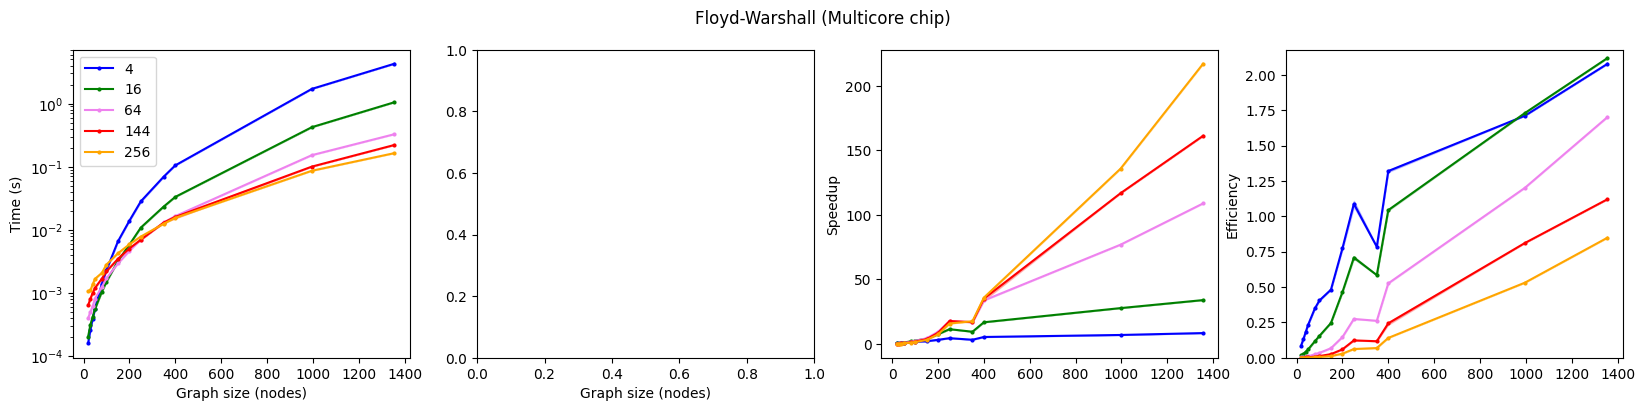

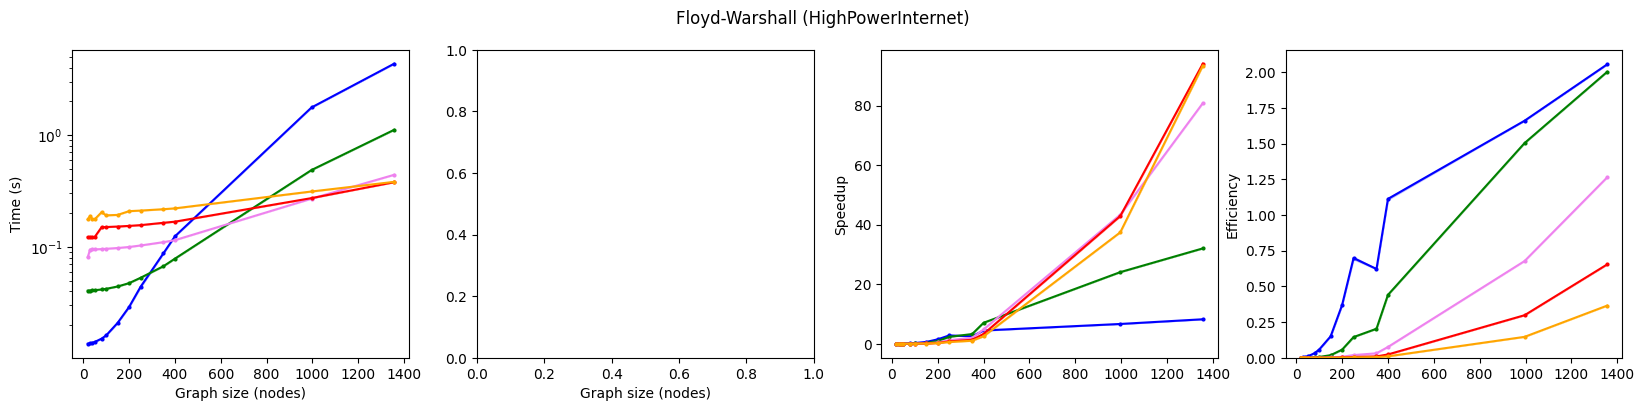

In [10]:
fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
algorithm = "floyd_warshall"

names = {
    "cannons": "Pipelined Cannon's",
    "unpipelined_cannons": "Cannon's",
    "foxotto": "Fox-Otto",
    "floyd_warshall": "Floyd-Warshall",
    "bellman_ford_adj_matrix": "Bellman-Ford",
    "distance_vector": "Distance Vector"
}

title_font = {"fontname": "CMU Serif Extra", "fontsize": 20}
legend_font = {"family": "CMU Serif Extra", "size": 11}
ax_font = {"fontname": "CMU Serif", "fontsize": 14}
font = {"fontname": "CMU Serif", "fontsize": 13}

colors = ["blue", "green", "violet", "red", "orange"]
sizes  = [2, 4, 8, 12, 16]
skip   = []
label = names[algorithm]
for i in range(len(sizes)):
    if sizes[i] in skip:
        continue
    plot_algorithm_on(ax, runs, algorithm, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20)
    # plot_utilization_on(ax2, runs, algorithm, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20)
    plot_speedup_on(ax3, runs, seq_runs, algorithm, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", plot_efficiency = False, sizes_geq=20)
    plot_speedup_on(ax4, runs, seq_runs, algorithm, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", plot_efficiency = True, sizes_geq=20)
ax.legend()
fig.suptitle(f"{label} (Multicore chip)")
ax.set_xlabel(f"Graph size (nodes)")
ax2.set_xlabel(f"Graph size (nodes)")

fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
for i in range(len(sizes)):
    if sizes[i] in skip:
        continue
    plot_algorithm_on(ax, runs, algorithm, sizes[i], "HighPowerInternet", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20)
    # plot_utilization_on(ax2, runs, algorithm, sizes[i], "HighPowerInternet", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20)
    plot_speedup_on(ax3, runs, seq_runs, algorithm, sizes[i], "HighPowerInternet", colors[i], f"{sizes[i]*sizes[i]}", plot_efficiency = False, sizes_geq=20)
    plot_speedup_on(ax4, runs, seq_runs, algorithm, sizes[i], "HighPowerInternet", colors[i], f"{sizes[i]*sizes[i]}", plot_efficiency = True, sizes_geq=20)
fig.suptitle(f"{label} (HighPowerInternet)")
ax.set_xlabel(f"Graph size (nodes)")
ax2.set_xlabel(f"Graph size (nodes)")
_ = ()

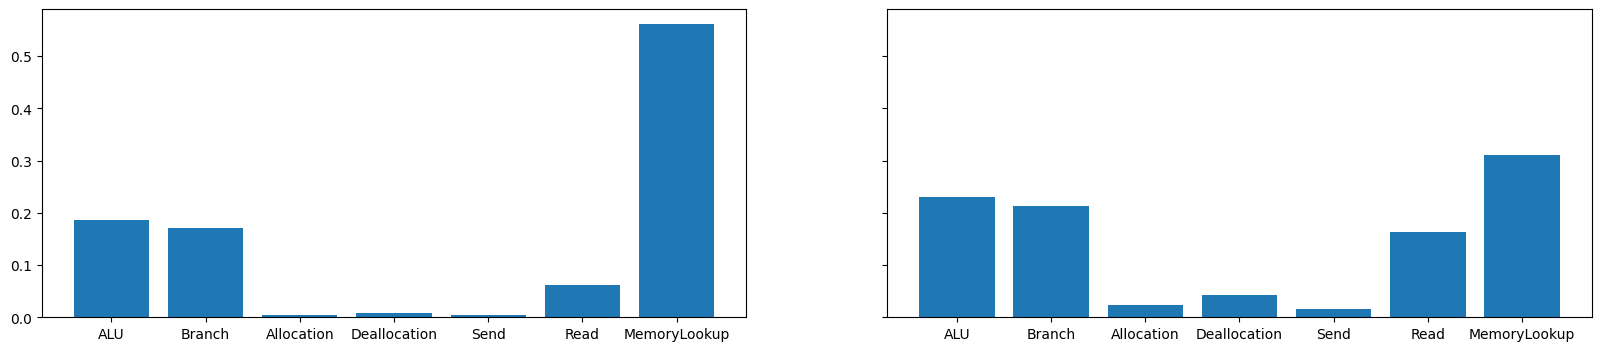

In [10]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 4), sharey=True)

plot_breakdown(ax, runs, "cannons", 2, 111, "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, core=(1,1), norm=True)
plot_breakdown(ax2, runs, "cannons", 4, 111, "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, core=(1,1), norm=True)

# plot_breakdown(ax2, seq_runs, "matmult_seq", 1, 111, "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20)

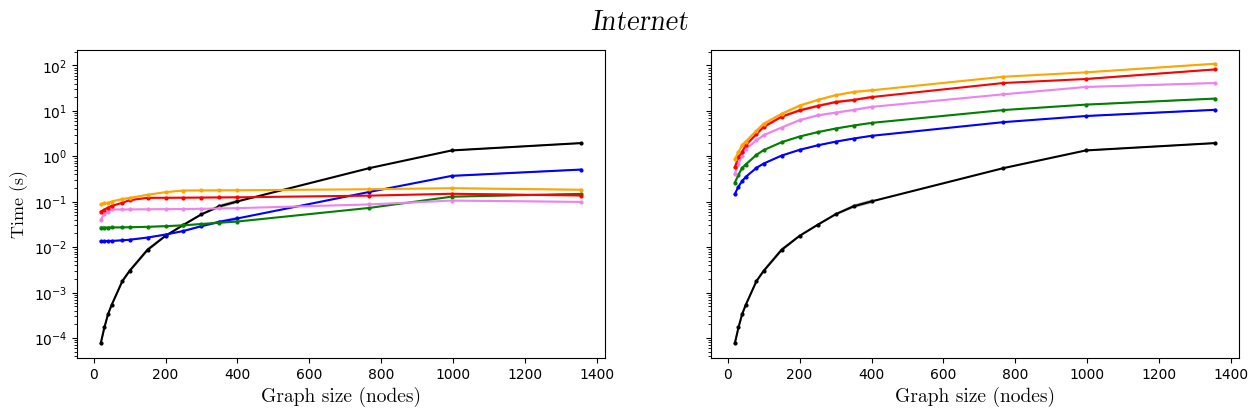

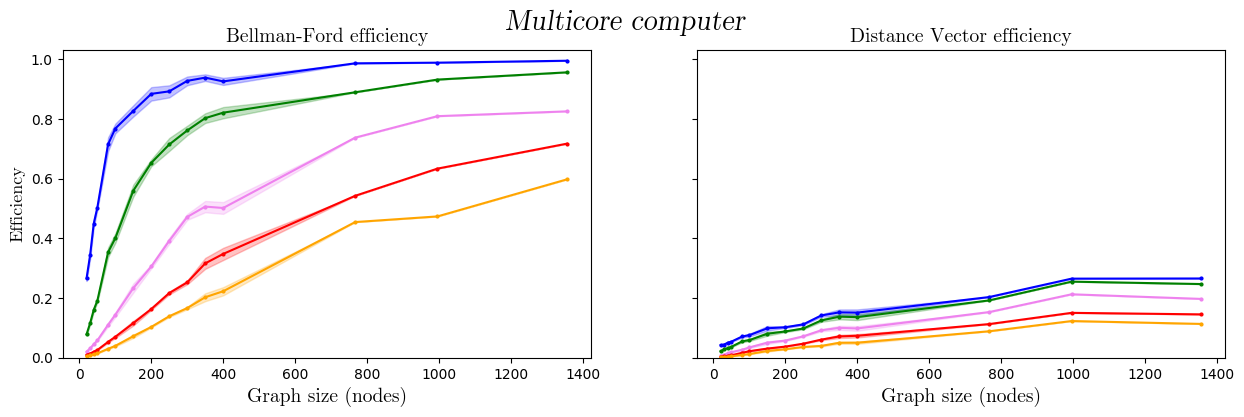

In [244]:
objective_time_range = (1e-4, 1e1)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)

seq_alg = "bellman_ford_seq"
alg1 = "bellman_ford_adj_matrix"
alg2 = "distance_vector"

plot_algorithm_on(ax1, seq_runs, seq_alg, 1, "MulticoreComputer", "black", f"$p={1}$", sizes_geq=20, core=(0, 0))
plot_algorithm_on(ax2, seq_runs, seq_alg, 1, "MulticoreComputer", "black", f"$p={1}$", sizes_geq=20, core=(0, 0))
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    plot_algorithm_on(ax1, runs, alg1, sizes[i], "HighPowerInternet", colors[i], f"$p={sizes[i]*sizes[i]}$", sizes_geq=20, **font)
    plot_algorithm_on(ax2, runs, alg2, sizes[i], "HighPowerInternet", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, **font)

fig.suptitle("Internet", **title_font)

ax2.set_ylabel("")
ax1.set_xlabel("Graph size (nodes)", **ax_font)
ax2.set_xlabel("Graph size (nodes)", **ax_font)
# fig.suptitle("Multicore computer", **title_font)
fig.savefig(f"img/{seq_alg}_highpowerinternet.png", dpi=500, bbox_inches="tight")


fig3, ((ax5, ax6)) = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    plot_speedup_on(ax5, runs, seq_runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, plot_efficiency=True, **font)
    plot_speedup_on(ax6, runs, seq_runs, alg2, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, plot_efficiency=True, **font)

ax5.set_title(f"{names[alg1]} efficiency", **ax_font)
ax6.set_title(f"{names[alg2]} efficiency", **ax_font)
ax6.set_ylabel("")
fig3.suptitle("Multicore computer", **title_font)

ax5.set_xlabel("Graph size (nodes)", **ax_font)
ax6.set_xlabel("Graph size (nodes)", **ax_font)

fig3.savefig(f"img/{seq_alg}_efficiency2.png", dpi=500, bbox_inches="tight")



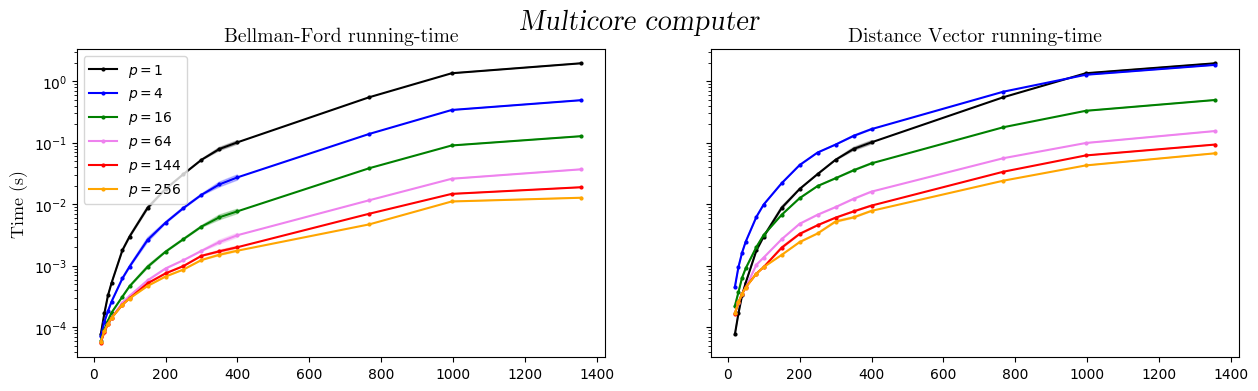

In [243]:

# ax3.set_ylim(ax1.get_ylim())
# ax3.set_xlim(ax1.get_xlim())


fig2, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)
plot_algorithm_on(ax3, seq_runs, seq_alg, 1, "MulticoreComputer", "black", f"$p={1}$", sizes_geq=20, core=(0, 0))
plot_algorithm_on(ax4, seq_runs, seq_alg, 1, "MulticoreComputer", "black", f"$p={1}$", sizes_geq=20, core=(0, 0))

ax3.set_title(f"{names[alg1]} running-time", **ax_font)
ax4.set_title(f"{names[alg2]} running-time", **ax_font)
# ax1.set_title("Bellman-Ford running-time")
# ax2.set_title("Distance vector running-time")
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    plot_algorithm_on(ax3, runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"$p={sizes[i]*sizes[i]}$", sizes_geq=20, **font)
    plot_algorithm_on(ax4, runs, alg2, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, **font)
    pass
ax4.set_ylabel("")
ax3.legend(loc="upper left", prop={"family": "CMU Serif"})
# fig2.suptitle("Datacenter", **title_font)

fig2.suptitle("Multicore computer", **title_font)

fig2.savefig(f"img/{seq_alg}_multicore.png", dpi=500, bbox_inches="tight")

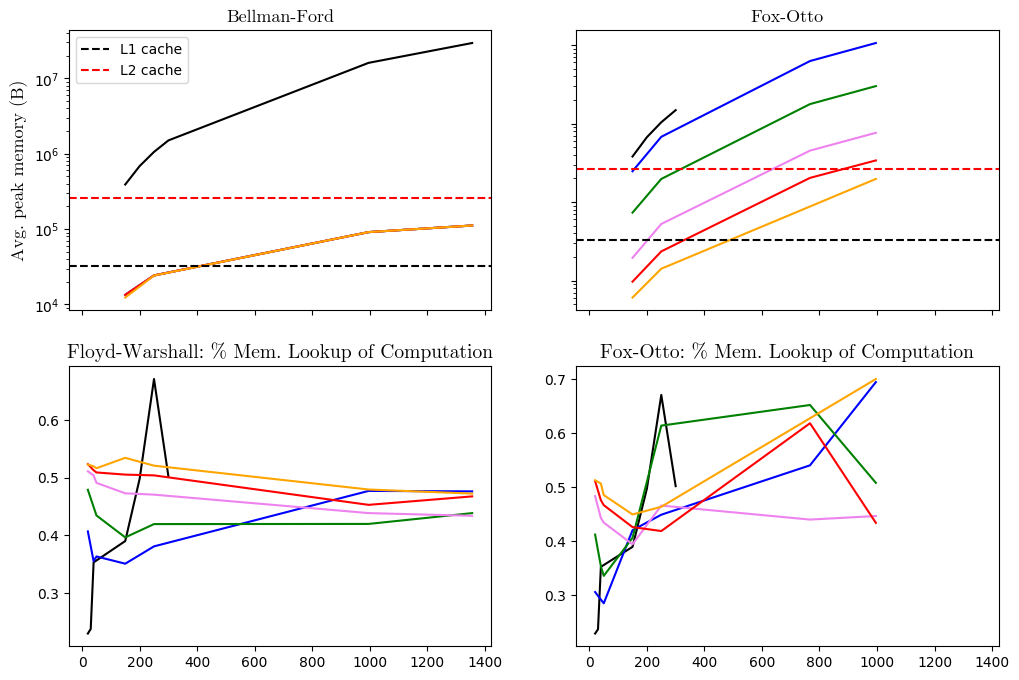

In [31]:
figmem, ((axmem1, axmem2), (axpercent1, axpercent2)) = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)

alg1 = "bellman_ford_adj_matrix"
alg_seq1 = "bellman_ford_seq"
alg2 = "foxotto"
alg_seq2 = "matmult_seq"


# ax1.set_title("Bellman-Ford running-time")
# ax2.set_title("Distance vector running-time")
plot_memory_on(axmem1, seq_runs, alg_seq1, 1, "MulticoreComputer", "black", f"{1}", sizes_geq=100, skip_edge=False, **font)
plot_memory_on(axmem2, seq_runs, alg_seq2, 1, "MulticoreComputer", "black", f"{1}", sizes_geq=100, skip_edge=False, **font)
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    # if sizes[i] == 12: continue
    plot_memory_on(axmem1, runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=100, **font)
    plot_memory_on(axmem2, runs, alg2, sizes[i], "MulticoreComputer", colors[i],  f"{sizes[i]*sizes[i]}", sizes_geq=100, **font)
    pass

for ax in [axmem1, axmem2]:
    ax.axhline(32768, label="L1 cache", linestyle="dashed",color="black")
    ax.axhline(262144, label="L2 cache", linestyle="dashed", color="r")


axmem1.legend()
axmem2.set_ylabel("")
axmem1.set_title(names[alg1], **font)
axmem2.set_title(names[alg2], **font)
# fig2.suptitle("Datacenter", **title_font)
axmem2.get_yaxis().set_ticklabels([])
# frame1.axes.get_yaxis().set_visible(False)

# figutil, ((axutil1, axutil2)) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

# plot_utilization_on(axutil1, seq_runs, alg_seq1, 1, "MulticoreComputer", "black", f"{1}", sizes_geq=20, core=(0, 0), **font)
# plot_utilization_on(axutil2, seq_runs, alg_seq2, 1, "MulticoreComputer", "black", f"{1}", sizes_geq=20, core=(0, 0),  **font)

# for i in range(len(sizes)):
#     # ax1.set_ylim(objective_time_range)
#     # if sizes[i] == 12: continue
#     plot_utilization_on(axutil1, runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, **font)
#     plot_utilization_on(axutil2, runs, alg2, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, **font)
#     pass

# axutil2.get_yaxis().set_ticklabels([])

exclude=["MessageSendEvent", "MessageReadEvent", "AllocationEvent", "DeallocationEvent"]

par_algorithm = "floyd_warshall"

plot_event_percent(axpercent1, seq_runs, seq_algorithm, 1, "CachedMemoryLookupEvent", "MulticoreComputer", "black", label="", sizes_geq=0, norm=True, exclude=exclude)
plot_event_percent(axpercent2, seq_runs, seq_algorithm2, 1, "CachedMemoryLookupEvent", "MulticoreComputer", "black", label="", sizes_geq=0, norm=True, exclude=exclude)
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    # if sizes[i] == 12: continue
    plot_event_percent(axpercent1, runs, par_algorithm, sizes[i], "CachedMemoryLookupEvent", "MulticoreComputer", colors[i], label="", sizes_geq=0, norm=True, exclude=exclude)
    plot_event_percent(axpercent2, runs, par_algorithm2, sizes[i], "CachedMemoryLookupEvent", "MulticoreComputer", colors[i], label="", sizes_geq=0, norm=True, exclude=exclude)
    axpercent1.set_title(f"{names[par_algorithm]}: % Mem. Lookup of Computation", **ax_font)
    axpercent2.set_title(f"{names[par_algorithm2]}: % Mem. Lookup of Computation", **ax_font)
    pass
_ = ()
# figmem.savefig("memfoxcan.png", dpi=500)
# figmem.savefig("memfoxcan.png", dpi=500)
_ = ()

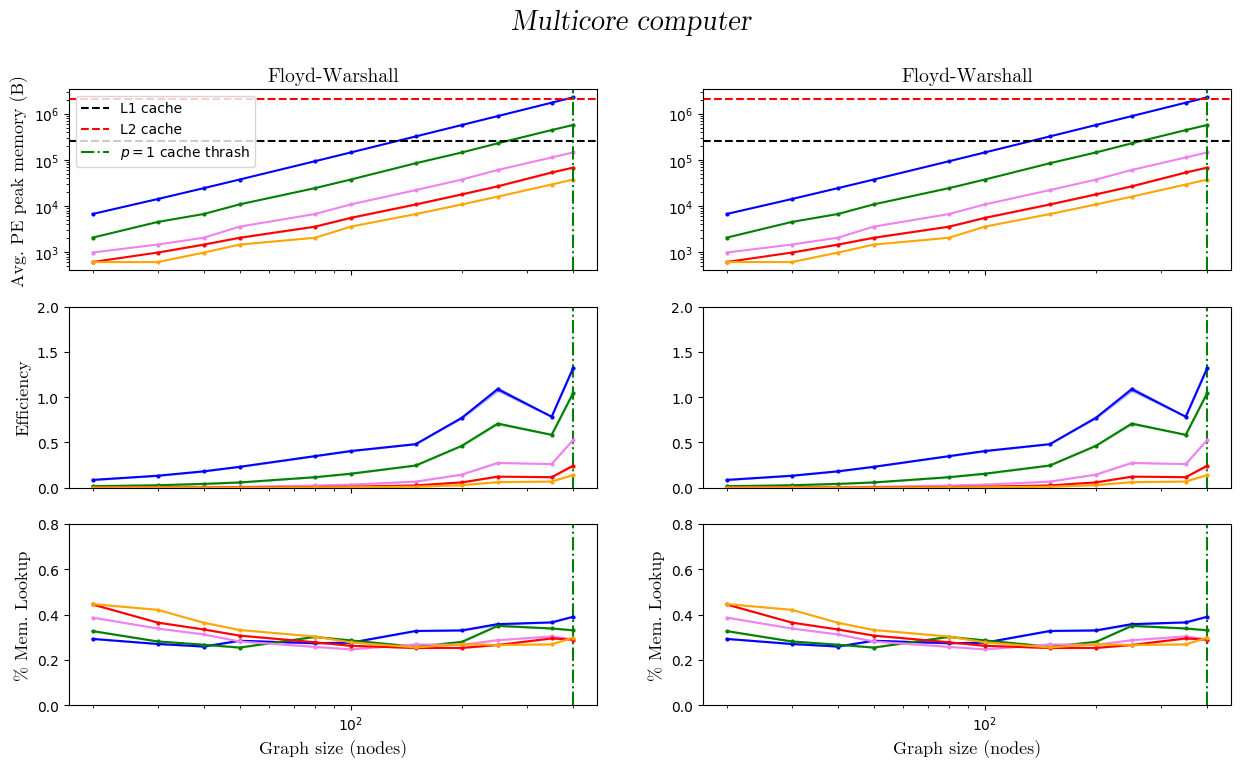

In [34]:
figmem, ((axmem1, axmem2), (axeff_1, axeff_2), (axpercent1, axpercent2)) = plt.subplots(3, 2, figsize=(15, 8), sharex=True, sharey=False)

# par_algorithm = "floyd_warshall"
# seq_algorithm = "floyd_warshall_seq"
# par_algorithm2 = "floyd_warshall"
# seq_algorithm2 = "floyd_warshall_seq"

par_algorithm = "floyd_warshall"
seq_algorithm = "floyd_warshall_seq"
par_algorithm2 = "floyd_warshall"
seq_algorithm2 = "floyd_warshall_seq"

# par_algorithm = "bellman_ford_adj_matrix"
# seq_algorithm = "bellman_ford_seq"
# par_algorithm2 = "distance_vector"
# seq_algorithm2 = "bellman_ford_seq"

alg_seq2 = seq_algorithm2 
alg_seq1 = seq_algorithm
alg1 = par_algorithm
alg2 = par_algorithm2

exclude=["MessageSendEvent", "MessageReadEvent", "AllocationEvent", "DeallocationEvent"]

figmem.suptitle("Multicore computer", **title_font)

axmem1.set_title(f"{names[par_algorithm]}", **ax_font)
axmem2.set_title(f"{names[par_algorithm2]}", **ax_font)

# plot_memory_on(axmem1, seq_runs, alg_seq1, 1, "MulticoreComputer", "black", f"{1}", sizes_geq=0, skip_edge=False, **font)
# plot_memory_on(axmem2, seq_runs, alg_seq2, 1, "MulticoreComputer", "black", f"{1}", sizes_geq=0, skip_edge=False, **font)
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    # if sizes[i] == 12: continue
    plot_memory_on(axmem1, runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=0, **font)
    plot_memory_on(axmem2, runs, alg2, sizes[i], "MulticoreComputer", colors[i],  f"{sizes[i]*sizes[i]}", sizes_geq=0, **font)
    pass

for ax in [axmem1, axmem2]:
    ax.axhline(32768*8, label="L1 cache", linestyle="dashed",color="black")
    ax.axhline(262144*8, label="L2 cache", linestyle="dashed", color="r")

for ax in (axmem1, axmem2, axeff_1, axeff_2, axpercent1, axpercent2):
    ax.axvline(400, label="$p=1$ cache thrash", color="green", linestyle="dashdot")

axmem1.legend(loc="upper left")
axmem2.set_ylabel("")

for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    plot_speedup_on(axeff_1, runs, seq_runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, plot_efficiency=True, **font)
    plot_speedup_on(axeff_2, runs, seq_runs, alg2, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, plot_efficiency=True, **font)

eff_y_range = (0, 2)
axeff_1.set_ylim(*eff_y_range)
axeff_2.set_ylim(*eff_y_range)
# axeff_1.set_title(f"{names[alg1]} efficiency", **ax_font)
# axeff_2.set_title(f"{names[alg2]} efficiency", **ax_font)
axeff_2.set_ylabel("")

# plot_event_percent(axpercent1, seq_runs, seq_algorithm, 1, "CachedMemoryLookupEvent", "MulticoreComputer", "black", label="", sizes_geq=0, norm=True, exclude=exclude)
# plot_event_percent(axpercent2, seq_runs, seq_algorithm2, 1, "CachedMemoryLookupEvent", "MulticoreComputer", "black", label="", sizes_geq=0, norm=True, exclude=exclude)
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    # if sizes[i] == 12: continue
    core = (0, 0)
    plot_event_percent(axpercent1, runs, par_algorithm, sizes[i], "CachedMemoryLookupEvent", "MulticoreComputer", colors[i], label="", sizes_geq=0, norm=True, exclude=exclude, core=core)
    plot_event_percent(axpercent2, runs, par_algorithm2, sizes[i], "CachedMemoryLookupEvent", "MulticoreComputer", colors[i], label="", sizes_geq=0, norm=True, exclude=exclude)
axpercent1.set_ylabel(f"% Mem. Lookup", **font)
axpercent2.set_ylabel(f"% Mem. Lookup", **font)
axpercent1.set_xscale("log")
axpercent2.set_xscale("log")

percent_y_range = (0, 0.8)
axpercent1.set_ylim(*percent_y_range)
axpercent2.set_ylim(*percent_y_range)

axpercent1.set_xlabel("Graph size (nodes)", **font)
axpercent2.set_xlabel("Graph size (nodes)", **font)

# axpercent2.set_xscale("log")

figmem.savefig(f"img/{seq_algorithm}_cache_memory.png", dpi=500, bbox_inches="tight")
_ = ()

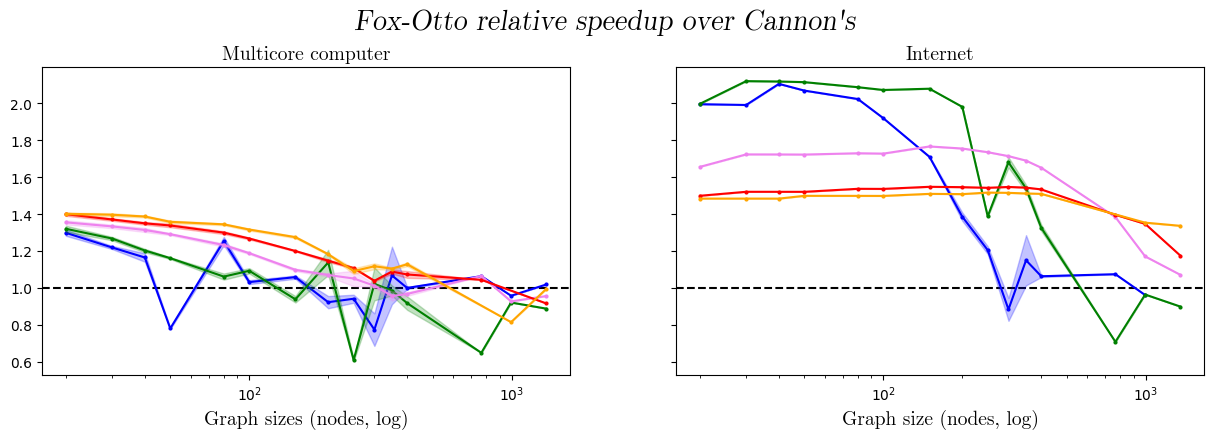

In [238]:
# Relative speedup
par_alg1 = "foxotto"
par_alg2 = "unpipelined_cannons"
figrel, ((axrel1, axrel2)) = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)
axrel2.axhline(y=1, color="black", linestyle="dashed", zorder=-100)
axrel1.axhline(y=1, color="black", linestyle="dashed", zorder=-100)
for i in range(len(sizes)):
    plot_relative_speedup_on(axrel2, runs, seq_runs, par_alg1, par_alg2, "", q=sizes[i], parameter="HighPowerInternet", color=colors[i], label="", sizes_geq=0)
    plot_relative_speedup_on(axrel1, runs, seq_runs, par_alg1, par_alg2, "", q=sizes[i], parameter="MulticoreComputer", color=colors[i], label="", sizes_geq=0)

axrel1.set_title("Multicore computer", **ax_font)
axrel2.set_title("Internet", **ax_font)

axrel2.set_xscale("log")
axrel1.set_xscale("log")

axrel1.set_xlabel("Graph sizes (nodes, log)", **ax_font)
axrel2.set_xlabel("Graph size (nodes, log)", **ax_font)

# axrel2.set_ylim(0.7, 1.3)

figrel.suptitle(f"{names[par_alg1]} relative speedup over {names[par_alg2]}", y=1.025, **title_font) 

figrel.savefig(f"img/{par_alg1}_vs_{par_alg2}.png", bbox_inches='tight', dpi=500)
_ = ()

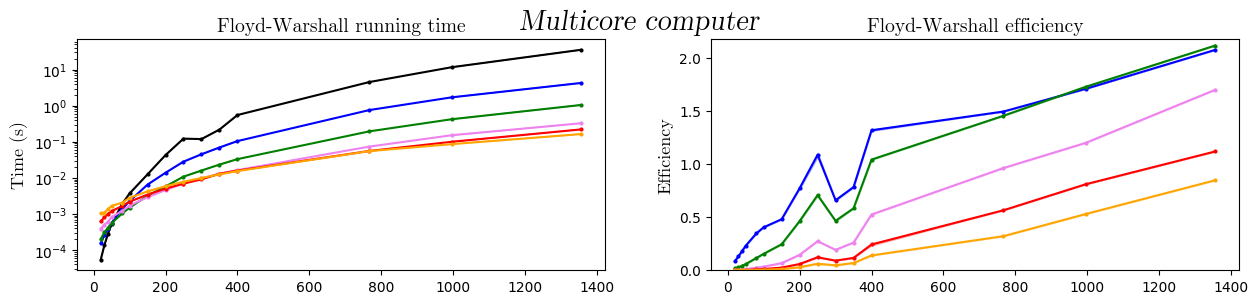

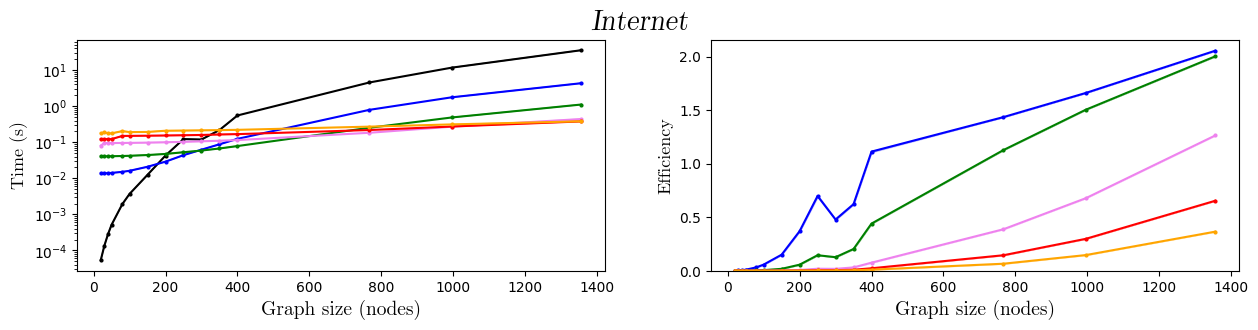

In [51]:
objective_time_range = (1e-4, 1e1)

fig1, ((ax1, ax5)) = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
fig2, ((ax2, ax6)) = plt.subplots(1, 2, figsize=(15, 3), sharex=True)

seq_alg = "floyd_warshall_seq"
alg1 = "floyd_warshall"

plot_algorithm_on(ax1, seq_runs, seq_alg, 1, "MulticoreComputer", "black", f"$p={1}$", sizes_geq=20, core=(0, 0))
plot_algorithm_on(ax2, seq_runs, seq_alg, 1, "MulticoreComputer", "black", f"$p={1}$", sizes_geq=20, core=(0, 0))
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    plot_algorithm_on(ax1, runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"$p={sizes[i]*sizes[i]}$", sizes_geq=20, **font)
    plot_algorithm_on(ax2, runs, alg1, sizes[i], "HighPowerInternet", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, **font)

fig1.suptitle("Multicore computer", **title_font)
ax1.set_title(f"{names[alg1]} running time", **ax_font)

# ax2.set_ylabel("")
# ax1.set_xlabel("Graph size (nodes)", **ax_font)
ax2.set_xlabel("Graph size (nodes)", **ax_font)
ax6.set_xlabel("Graph size (nodes)", **ax_font)


for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    plot_speedup_on(ax5, runs, seq_runs, alg1, sizes[i], "MulticoreComputer", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, plot_efficiency=True, **font)
    plot_speedup_on(ax6, runs, seq_runs, alg1, sizes[i], "HighPowerInternet", colors[i], f"{sizes[i]*sizes[i]}", sizes_geq=20, plot_efficiency=True, **font)

ax5.set_title(f"{names[alg1]} efficiency", **ax_font)
# ax6.set_title(f"{names[alg1]} efficiency", **ax_font)

fig2.suptitle("Internet", **title_font)
# ax6.set_ylabel("")

fig1.savefig(f"img/{alg1}_multicore.png", bbox_inches='tight', dpi=500)
fig2.savefig(f"img/{alg1}_highpowerinternet.png", bbox_inches='tight', dpi=500)



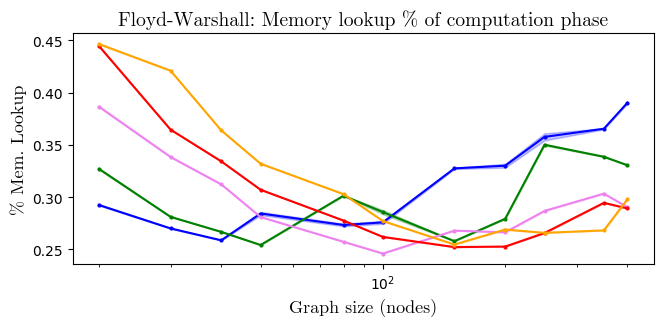

In [28]:
fig2, (axpercent1) = plt.subplots(1, 1, figsize=(7.5, 3), sharex=True)

seq_algorithm = "floyd_warshall_seq"
par_algorithm = "floyd_warshall"

# plot_event_percent(axpercent1, seq_runs, seq_algorithm, 1, "CachedMemoryLookupEvent", "MulticoreComputer", "black", label="", sizes_geq=0, norm=True, exclude=exclude)
for i in range(len(sizes)):
    # ax1.set_ylim(objective_time_range)
    # if sizes[i] == 12: continue
    core = (0, 0)
    plot_event_percent(axpercent1, runs, par_algorithm, sizes[i], "CachedMemoryLookupEvent", "MulticoreComputer", colors[i], label="", sizes_geq=0, norm=True, exclude=exclude, core=core)

axpercent1.set_title(f"{names[par_algorithm]}: Memory lookup % of computation phase", **ax_font)
axpercent1.set_ylabel(f"% Mem. Lookup", **font)
axpercent1.set_xscale("log")
axpercent1.set_xlabel("Graph size (nodes)", **font)
fig2.savefig(f"img/{seq_algorithm}_memlookup.png", dpi=500, bbox_inches="tight")

[1, 1, 2, 4, 8, 12, 16]
[2614971.28205128 2614971.28205128 3948398.         1039921.5
  266750.375       125386.83333333   68987.0625    ]
[1, 2, 4, 8, 12, 16]
[2614971.28205128 3143526.          878237.5         225863.375
  106259.27777778   58499.3125    ]
[1, 1, 2, 4, 8, 12, 16]
[2614899.28205128 2614899.28205128 2258228.          569267.
  144693.5          67978.44444444   37432.71875   ]
[1, 2, 4, 8, 12, 16]
[2644575.79487179  677733.2         196549.7          76253.825
   53976.81111111   46179.85625   ]
[1, 1, 2, 4, 8, 12, 16]
[2644575.79487179 2644575.79487179 1859128.4         482588.6
  124247.9          57306.4          33818.94375   ]


/home/jsyiek/miniconda3/envs/dissertation/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/jsyiek/miniconda3/envs/dissertation/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


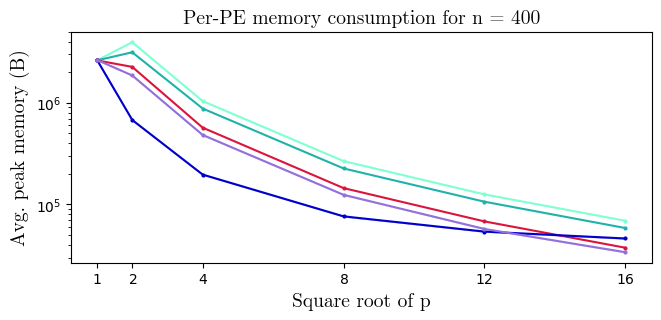

In [240]:
fig2, (axpercent1) = plt.subplots(1, 1, figsize=(7.5, 3), sharex=True)

par_algs = ["unpipelined_cannons", "foxotto", "floyd_warshall", "bellman_ford_adj_matrix", "distance_vector"]
seq_algs = ["matmult_seq", "matmult_seq", "floyd_warshall_seq", "bellman_ford_seq", "bellman_ford_seq"]
alg_colors = ["aquamarine", "lightseagreen", "crimson", "mediumblue", "mediumpurple"]


size = 400
# plot_event_percent(axpercent1, seq_runs, seq_algorithm, 1, "CachedMemoryLookupEvent", "MulticoreComputer", "black", label="", sizes_geq=0, norm=True, exclude=exclude)
for (p, s, c) in zip(par_algs, seq_algs, alg_colors):
    compare_memory_on(axpercent1, seq_runs, s, runs, p, size, c, label=f"{names[p]}", skip_edge=True, **font)
    # ax1.set_ylim(objective_time_range)
    # if sizes[i] == 12: continue
    # core = (0, 0)
    # plot_event_percent(axpercent1, runs, par_algorithm, sizes[i], "CachedMemoryLookupEvent", "MulticoreComputer", colors[i], label="", sizes_geq=0, norm=True, exclude=exclude, core=core)


axpercent1.set_xscale("linear")
qs = [1, 2, 4, 8, 12, 16]
xticks = [f"${i}$" for i in qs]
ps = np.array(qs)#**2
axpercent1.set_xticks(ps, xticks)
# axpercent1.set_yscale("linear")

axpercent1.set_xlabel("Square root of p", **ax_font)
# axpercent2.set_xlabel("Square root of p")

axpercent1.set_title("Per-PE memory consumption for n = 400", **ax_font)
axpercent1.set_ylabel("Avg. peak memory (B)", **ax_font)

fig2.savefig(f"img/memory_comparison{size}.png", dpi=500, bbox_inches='tight')

# axpercent2.set_title("Execution duration trends for n = 400", **ax_font)
# compare_memory_on

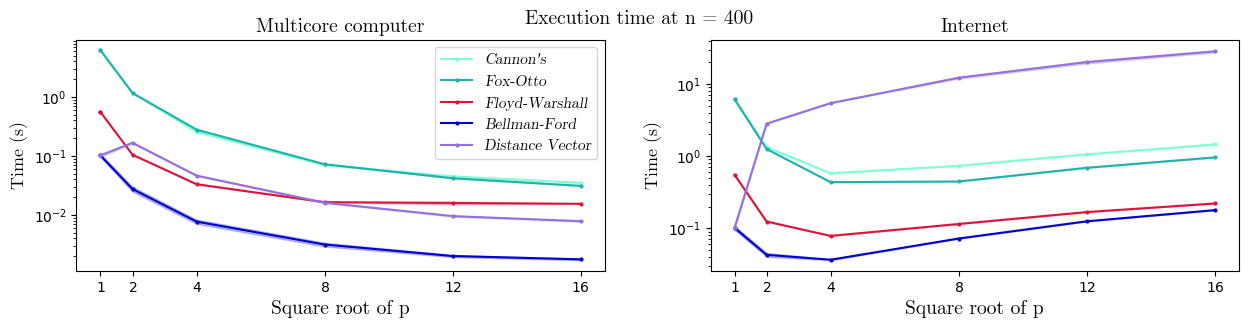

In [239]:
fig_time_comp, (axtime_mult, axtime_dist) = plt.subplots(1, 2, figsize=(15, 3), sharex=True)

# plot_event_percent(axpercent1, seq_runs, seq_algorithm, 1, "CachedMemoryLookupEvent", "MulticoreComputer", "black", label="", sizes_geq=0, norm=True, exclude=exclude)
for (p, s, c) in zip(par_algs, seq_algs, alg_colors):
    compare_algorithm_on(axtime_mult, seq_runs, s, runs, p, size, "MulticoreComputer", c, label=f"{names[p]}", core=DESIGNATED_PARA_CORE, **font)
    compare_algorithm_on(axtime_dist, seq_runs, s, runs, p, size, "HighPowerInternet", c, label="", core=DESIGNATED_PARA_CORE, **font)

axtime_mult.set_xscale("linear")
axtime_mult.set_xticks(ps, xticks)
axtime_dist.set_xticks(ps, xticks)

axtime_mult.set_title("Multicore computer", **ax_font)
axtime_dist.set_title("Internet", **ax_font)
fig_time_comp.suptitle("Execution time at n = 400", **ax_font)
# axpercent1.set_yscale("linear")

axtime_mult.set_xlabel("Square root of p", **ax_font)
axtime_dist.set_xlabel("Square root of p", **ax_font)

axtime_mult.legend(prop=legend_font)

fig_time_comp.savefig(f"img/time_comparison{size}.png", dpi=500, bbox_inches='tight')
() = ()

In [21]:
import matplotlib.font_manager
flist = matplotlib.font_manager.findSystemFonts()
for f in flist:
    if matplotlib.font_manager.FontProperties(fname=f).get_name() == "Latin Modern Roman" and "bold" not in f:
        font = f
        print("found it!")
        break
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
font

found it!


'/usr/share/texmf/fonts/opentype/public/lm/lmroman5-regular.otf'